In [1]:
from PBSHM_mdof.system.mdof_system import Mdof_system
from PBSHM_mdof.system.population import Population
from PBSHM_mdof.system.Envirement_sim import Population_EOC_generator
from PBSHM_mdof.system.simulation import Simulation

In [2]:
from config import settings
settings.default.path

<Box: {'origin': './data', 'system_description': './data/systems/parameters.json'}>

In [3]:
healthy_population=Population()
healthy_population.generate_system_variables()

In [4]:
simulator = Simulation(healthy_population,dt=0.0025,t_end=10.0)

In [5]:
acc7=simulator.simulation_white_noise()['system_0']['output'][:,2*8+1]

In [6]:
import matplotlib.pyplot as plt
from scipy import signal
def compute_PSD(acc,dt):
    f, Pxx_den = signal.welch(acc, 1/dt, nperseg=1024, scaling='spectrum')
    return f,Pxx_den

In [7]:
f,Sxx= compute_PSD(acc7,0.0025)

(0.0, 125.0)

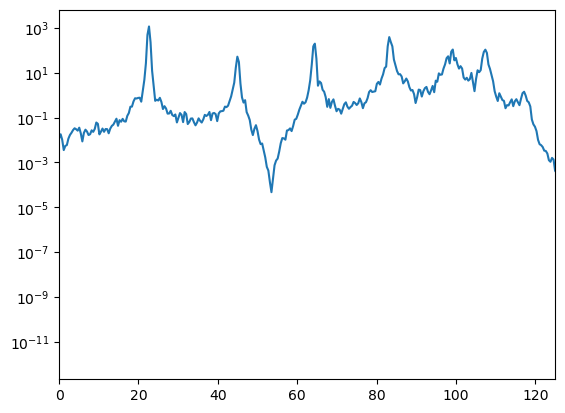

In [8]:
plt.plot(f,Sxx)
plt.yscale('log')
plt.xlim(0,125)

In [9]:
population_affected=Population_EOC_generator(healthy_population)
population_affected.generate_coefficients()

In [10]:
population_example = population_affected.affect_temperature(50)
population_example.compute_systems_matrices()

In [11]:
simulator = Simulation(population_example,dt=0.0025,t_end=10.0)

In [12]:
acc7=simulator.simulation_white_noise()['system_0']['output'][:,2*8+1]

In [13]:
f,Sxx1= compute_PSD(acc7,0.0025)

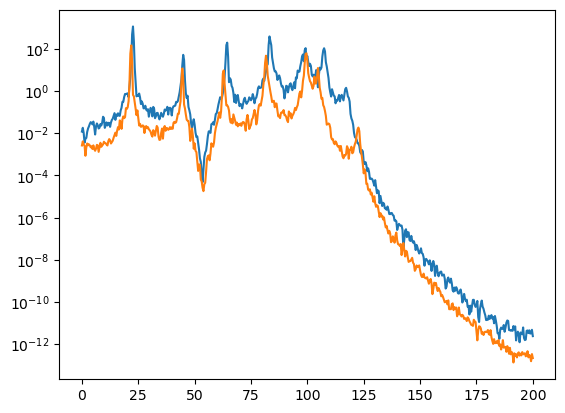

In [15]:
plt.plot(f,Sxx)
plt.plot(f,Sxx1)
plt.yscale('log')

In [16]:
population_examplepopulation_example.add_anomaly(anomaly_size=0.14)

In [17]:
simulator = Simulation(population_example,dt=0.0025,t_end=10.0)

In [154]:
acc7=simulator.simulation_white_noise()['system_0']['output'][:,2*8+1]

In [155]:
f,Sxx2= compute_PSD(acc7,0.0025)

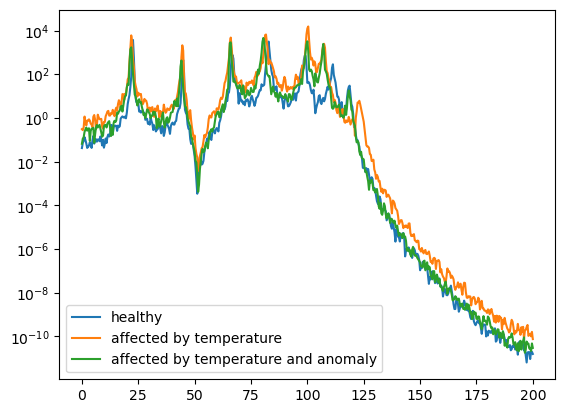

In [158]:
plt.plot(f,Sxx, label='healthy')
plt.plot(f,Sxx1, label='affected by temperature')
plt.plot(f,Sxx2, label='affected by temperature and anomaly')
plt.yscale('log')
plt.legend()